1. [10 pts] How many species must be there in the dataset? (For the rest of this assignment,
    use that number as the number-of-clusters parameter in methods such as KMeans)

In [1]:
import pandas as pd, numpy as np, sklearn as sk, seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline

syn_df = pd.read_csv("synthetic_clustering_dataset.csv")
print(syn_df)

           f1        f2
0    0.494261  1.451067
1   -1.428081 -0.837064
2    0.338559  1.038759
3    0.119001 -1.053976
4    1.122425  1.774937
..        ...       ...
745  0.505927  1.213927
746 -1.640461 -0.469973
747 -0.057139 -0.909261
748 -1.169394  0.039597
749  0.263230 -0.926499

[750 rows x 2 columns]


In [2]:
#understanding the data set
print(syn_df.info())
#There are no null values!

#Descriptive Statistics
print(syn_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      750 non-null    float64
 1   f2      750 non-null    float64
dtypes: float64(2)
memory usage: 11.8 KB
None
                 f1            f2
count  7.500000e+02  7.500000e+02
mean   5.222933e-15 -7.853925e-14
std    1.000667e+00  1.000667e+00
min   -2.274474e+00 -1.823801e+00
25%   -1.091894e+00 -7.775487e-01
50%    3.886712e-01 -4.095144e-01
75%    7.787849e-01  1.052538e+00
max    1.870438e+00  2.245794e+00


1) There are two different species and 750 rows for both of the species. The number of clusters parameters for KMeans will be 2.

2. [10 pts] Find the rough feature ranges to classify these species correctly. It might be a good
    idea to do this step visually from some data plots.

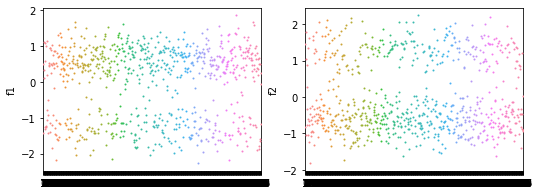

In [3]:
plt.figure(figsize=(18, 3))

ax=plt.subplot(1, 4, 1)
sns.swarmplot(x=syn_df.index, y=syn_df["f1"], size=2)

ax=plt.subplot(1, 4, 2)
sns.swarmplot(x=syn_df.index, y=syn_df["f2"], size=2)
              
plt.show()

In [4]:
#Descriptive Statistics
print(syn_df.describe())

                 f1            f2
count  7.500000e+02  7.500000e+02
mean   5.222933e-15 -7.853925e-14
std    1.000667e+00  1.000667e+00
min   -2.274474e+00 -1.823801e+00
25%   -1.091894e+00 -7.775487e-01
50%    3.886712e-01 -4.095144e-01
75%    7.787849e-01  1.052538e+00
max    1.870438e+00  2.245794e+00


2) Species f1 is between -2.3 & 2. Species f2 is between -1.8 & 2.25. Roughly both are between +/- 2.3.

3. [20 pts] Use K-means clustering to find anomalies (Hint: find cluster data points that are far
    to the centroids).

[0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0
 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1
 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1
 0 1 0 0 0 0 1 0 0 1 0 0 

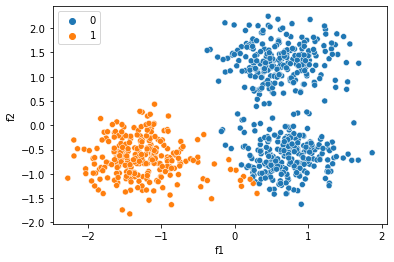

In [5]:
from sklearn.datasets import make_blobs
import pandas as pd

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(syn_df)

print(kmeans.labels_)  # same as kmeans.predict(df)


print(kmeans.inertia_)

print(kmeans.n_iter_)

print(kmeans.cluster_centers_)

import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=syn_df, x="f1", y="f2", hue=kmeans.labels_)
plt.show()




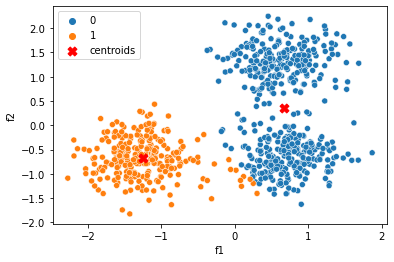

In [6]:
sns.scatterplot(data=syn_df, x="f1", y="f2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

4. [20 pts] Use DBSCAN clustering to find anomalies in the full dataset as an alternative to
    (Q4.).

[-1  0  1  0  1 -1  0  1  0  0  0  1  0  1  1 -1  1  1 -1  1 -1  1  1  1
 -1  0  1  0  0  1  0  1 -1  1  0  0  0  0  1 -1  0  1  1  0  1  1  0 -1
  0  0 -1  0  0  0  0  1  1 -1 -1  1  0  0  1 -1  0  1  1  0  1  1  0  0
 -1  1  0  1 -1  0  1  1  0  1 -1  1  1  1  0 -1  1  1  0 -1  0  1  0 -1
  0  0  1 -1  0  1  1  1  1 -1  1  0  1  1  0  1 -1  0  1  1 -1  0  1  0
  0 -1  1 -1  0  1 -1 -1  0  0  0  1  0  0  0  0  1  0  0  0  1  0  1  0
  0  1 -1  0  0  1 -1 -1  1  0  0  0  1  1  0  1  1 -1 -1  0  1  1  1  1
 -1  1 -1  0  0  1  1  1  1  1  0  0  1  1  1  1  0 -1  1  0  1  1 -1  0
  0  1 -1  0  1  0  1 -1  1 -1  0  0  1 -1  1  0 -1 -1 -1  0 -1  1  1  1
  0  1  1  0  1  0 -1  0  1  1  0  1  1  0  1  1  0  0  0  1  1  1  0  0
  0  0  0  0  1  0  1  1  0 -1 -1  1  1  0 -1 -1  0  1 -1  0  1  0  1 -1
  1  0  0 -1  1  1  1  1  0 -1  1 -1  1 -1  1  1  0  0  0  1  1  0  0 -1
  1  1  1  0  0  1 -1  0  1 -1  0  1]
Estimated number of clusters: 2
Homogeneity: 0.815
Completeness: 0.539
V-measure: 0.64

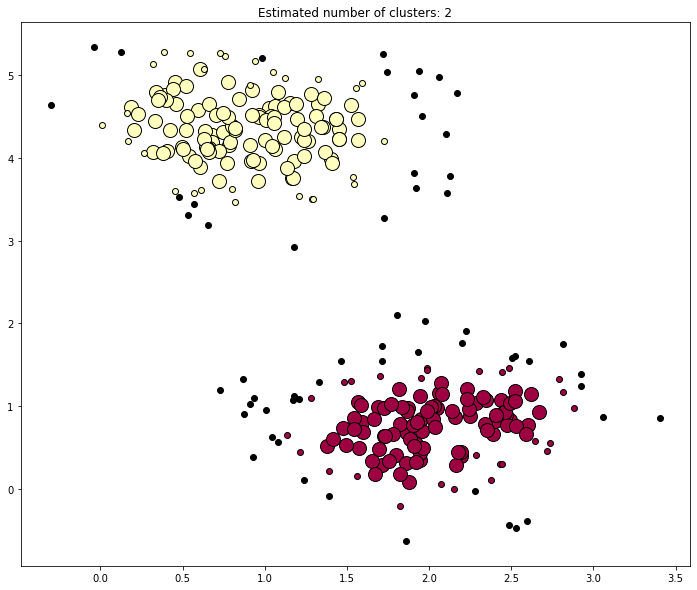

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

X = syn_df

X, y_true = make_blobs(n_samples=300, centers=2,
                       cluster_std=0.50, random_state=0)
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

print(labels)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
  
# Plot result
  
# Black removed and is used for noise instead.
unique_labels = set(labels)
plt.figure(figsize = [12,10])
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

5. [30 pts] Now using the cleaned dataset by a method of your choice (i.e., Q3. or Q4.),
    develop a decision tree classifier to model the species and visualize the model decision
    tree.

5) Used the DBSCAN method before the Decision Tree Classifier.

In [8]:
from sklearn import tree
from sklearn.metrics import accuracy_score

import pydotplus
clf = tree.DecisionTreeClassifier()
dbscan = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)
clf.classes_ = [0,1]
dtree = clf.fit(X, dbscan)
res_pred = clf.predict(X)

acc = accuracy_score(dbscan, res_pred)

print("The accuracy of the Decision Tree on the dbscan is " + str(acc*100) + "%")

The accuracy of the Decision Tree on the dbscan is 100.0%


[Text(903.9599999999999, 1540.2, 'X[1] <= 3.453\ngini = 0.636\nsamples = 300\nvalue = [58, 114, 128]'),
 Text(502.19999999999993, 1359.0, 'X[1] <= 1.507\ngini = 0.389\nsamples = 155\nvalue = [41, 114, 0]'),
 Text(435.23999999999995, 1177.8, 'X[0] <= 1.357\ngini = 0.287\nsamples = 138\nvalue = [24, 114, 0]'),
 Text(133.92, 996.6, 'X[0] <= 1.107\ngini = 0.291\nsamples = 17\nvalue = [14, 3, 0]'),
 Text(66.96, 815.4, 'gini = 0.0\nsamples = 9\nvalue = [9, 0, 0]'),
 Text(200.88, 815.4, 'X[0] <= 1.152\ngini = 0.469\nsamples = 8\nvalue = [5, 3, 0]'),
 Text(133.92, 634.2, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84, 634.2, 'X[0] <= 1.21\ngini = 0.408\nsamples = 7\nvalue = [5, 2, 0]'),
 Text(200.88, 453.0, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(334.79999999999995, 453.0, 'X[1] <= 0.283\ngini = 0.5\nsamples = 4\nvalue = [2, 2, 0]'),
 Text(267.84, 271.79999999999995, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(401.76, 271.79999999999995, 'X[0] <= 1.306\ngini 

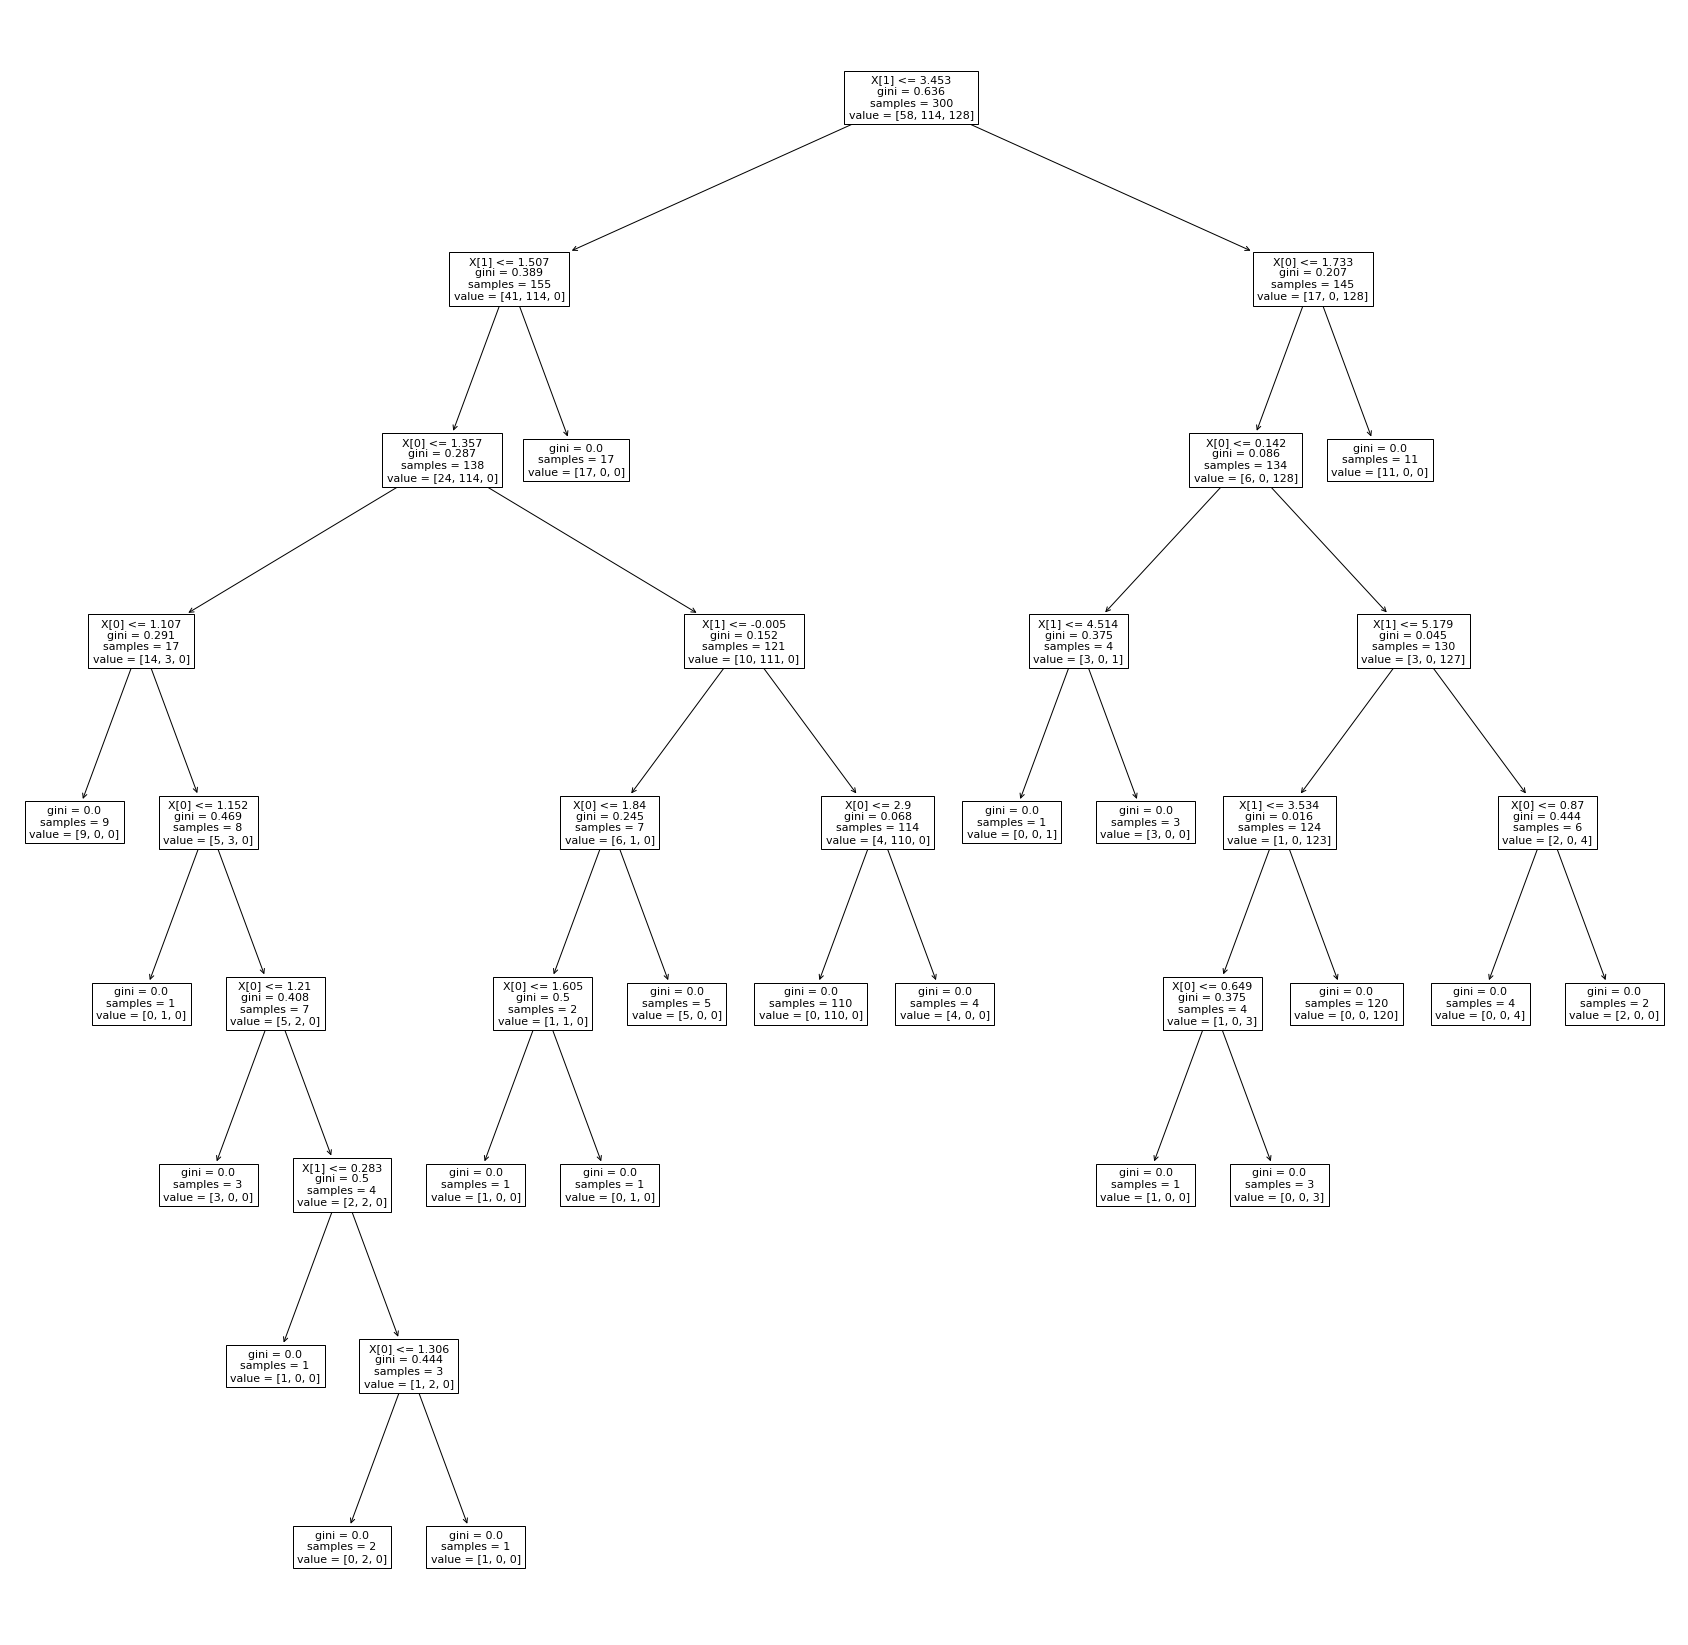

In [9]:
plt.figure(figsize=(30,30))

tree.plot_tree(dtree)

6. [10 pts] Show that, in fact, it helped to clean the outliers before generating the decision
tree.

In [10]:
#Accuracy score before DBscan
clf_b = tree.DecisionTreeClassifier()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_b, X, y_true, cv=5)
acc_b = scores.mean()

print("The accuracy of the Decision Tree on the dbscan is " + str(acc_b*100) + "%")

The accuracy of the Decision Tree on the dbscan is 100.0%


6) It did clean the outliers before generating tbe decision tree in the image in cell [7]. I'm not sure if this improved the result, it is hard to test given the cl\ustering of the data.